https://github.com/Coding-Lane/Image-Classification-CNN-Keras

Dataset Used: https://bit.ly/ImgClsKeras

# Assignment: image classification

Implement a CNN using Keras on top of TensorFlow to create a binary image classification model for predicting whether a given picture is of a cat or a dog.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [4]:
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [ ]:
print(len(X_train))

2000


In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
#Normalization:

#The pixel values in images are typically in the range of 0 to 255. Normalizing the pixel values to the range [0, 1] is a common preprocessing step in machine learning.
#By dividing X_train and X_test by 255.0, the pixel values are scaled to the range [0, 1]. This normalization helps in training neural networks more effectively, as it ensures that the input values are within a similar scale.
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


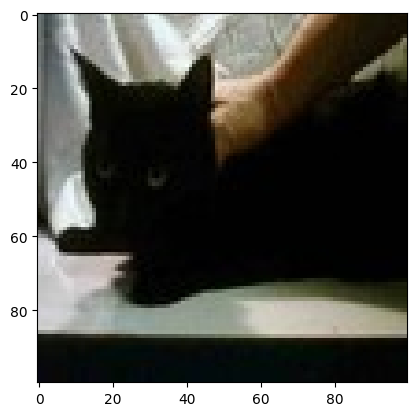

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
#print("Shape of X_train: ", X_train[1:7])

In [8]:
print("Shape of X_train: ", Y_train[1:7])


Shape of X_train:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# **Model**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

# Assuming your data represents grayscale images with dimensions 100x100
#height, width, channels = 100, 100, 1

model = Sequential([
    # Convolutional layers
    #input_shape=(height, width, channels)
    #nput_shape = (100, 100, 3)
    #his indicates that each sample in your dataset is an image with dimensions 100x100 pixels and 3 color channels (assuming RGB images)
    Conv2D(32, (3, 3), input_shape = (100, 100, 3) ),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to transition from convolutional to fully connected layers
    Flatten(),

    # Fully connected layers
    Dense(64),
    Activation('relu'),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                   

In [10]:
from tensorflow.keras.optimizers import Adam


In [11]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
#Assuming you have labels Y_train and Y_test for your training and testing data

In [12]:
# Train the model
model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
50/50 [==============================] - 47s 843ms/step - loss: 0.6750 - accuracy: 0.6137 - val_loss: 0.8245 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 [==============================] - 35s 701ms/step - loss: 0.6508 - accuracy: 0.6250 - val_loss: 0.9915 - val_accuracy: 0.0100
Epoch 3/5
50/50 [==============================] - 35s 705ms/step - loss: 0.6207 - accuracy: 0.6513 - val_loss: 0.9097 - val_accuracy: 0.3475
Epoch 4/5
50/50 [==============================] - 38s 769ms/step - loss: 0.5874 - accuracy: 0.6844 - val_loss: 0.7064 - val_accuracy: 0.5825
Epoch 5/5
50/50 [==============================] - 37s 727ms/step - loss: 0.5603 - accuracy: 0.7138 - val_loss: 0.8296 - val_accuracy: 0.4900


In [13]:
model.evaluate(X_test, Y_test) #epochs=10, batch_size=32, validation_split=0.2

13/13 [==============================] - 2s 149ms/step - loss: 0.6436 - accuracy: 0.6575


[0.6436384320259094, 0.6575000286102295]

In [14]:
# Train the model
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 36s 1s/step - loss: 0.5110 - accuracy: 0.7525 - val_loss: 1.2574 - val_accuracy: 0.2650
Epoch 2/5
25/25 [==============================] - 38s 2s/step - loss: 0.4728 - accuracy: 0.7725 - val_loss: 0.7757 - val_accuracy: 0.5850
Epoch 3/5
25/25 [==============================] - 35s 1s/step - loss: 0.4329 - accuracy: 0.7925 - val_loss: 0.7489 - val_accuracy: 0.6250
Epoch 4/5
25/25 [==============================] - 34s 1s/step - loss: 0.3977 - accuracy: 0.8200 - val_loss: 0.6981 - val_accuracy: 0.6325
Epoch 5/5
25/25 [==============================] - 35s 1s/step - loss: 0.3648 - accuracy: 0.8406 - val_loss: 0.9451 - val_accuracy: 0.5550


In [ ]:
model.evaluate(X_test, Y_test)#pochs=10, batch_size=64, validation_split=0.2

13/13 [==============================] - 3s 257ms/step - loss: 0.5951 - accuracy: 0.6875


[0.5950837135314941, 0.6875]

# Main Model

In [25]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 25s 740ms/step - loss: 0.6937 - accuracy: 0.5035
Epoch 2/5
32/32 [==============================] - 27s 845ms/step - loss: 0.6925 - accuracy: 0.5425
Epoch 3/5
32/32 [==============================] - 24s 739ms/step - loss: 0.6916 - accuracy: 0.5250
Epoch 4/5
32/32 [==============================] - 25s 779ms/step - loss: 0.6854 - accuracy: 0.5625
Epoch 5/5
32/32 [==============================] - 26s 809ms/step - loss: 0.6782 - accuracy: 0.5840


In [24]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 87ms/step - loss: 0.6355 - accuracy: 0.6400


[0.6354970335960388, 0.6399999856948853]

# Making predictions

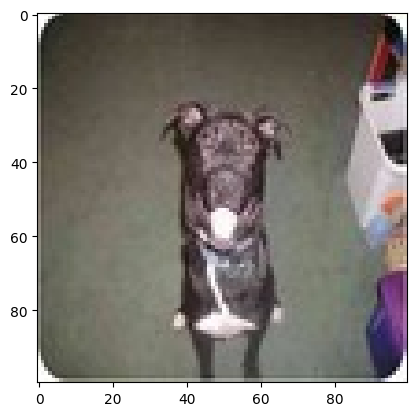

1/1 [==============================] - 0s 156ms/step
Our model says it is a : dog


In [19]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
#Normalization:

#The pixel values in images are typically in the range of 0 to 255. Normalizing the pixel values to the range [0, 1] is a common preprocessing step in machine learning.
#By dividing X_train and X_test by 255.0, the pixel values are scaled to the range [0, 1]. This normalization helps in training neural networks more effectively, as it ensures that the input values are within a similar scale.
X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
model.evaluate(X_test, Y_test)

Epoch 1/5
32/32 [==============================] - 27s 762ms/step - loss: 0.6935 - accuracy: 0.5015
Epoch 2/5
32/32 [==============================] - 31s 981ms/step - loss: 0.6917 - accuracy: 0.5245
Epoch 3/5
32/32 [==============================] - 25s 775ms/step - loss: 0.6806 - accuracy: 0.5600
Epoch 4/5
32/32 [==============================] - 26s 811ms/step - loss: 0.6840 - accuracy: 0.5370
Epoch 5/5
13/13 [==============================] - 1s 93ms/step - loss: 0.6482 - accuracy: 0.6175


[0.6482143998146057, 0.6175000071525574]

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter=',')
X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter=',')

# Reshape data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Model training
model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=10, callbacks=[lr_scheduler])

# Model evaluation
model.evaluate(X_test, Y_test)


Epoch 1/10
32/32 [==============================] - 31s 912ms/step - loss: 0.6947 - accuracy: 0.5095 - lr: 0.0010
Epoch 2/10
32/32 [==============================] - 36s 1s/step - loss: 0.6943 - accuracy: 0.5045 - lr: 0.0010
Epoch 3/10
32/32 [==============================] - 30s 964ms/step - loss: 0.6934 - accuracy: 0.4975 - lr: 0.0010
Epoch 4/10
32/32 [==============================] - 30s 900ms/step - loss: 0.6931 - accuracy: 0.5025 - lr: 0.0010
Epoch 5/10
32/32 [==============================] - 32s 989ms/step - loss: 0.6925 - accuracy: 0.5210 - lr: 0.0010
Epoch 6/10
32/32 [==============================] - 28s 880ms/step - loss: 0.6922 - accuracy: 0.5225 - lr: 0.0010
Epoch 7/10
32/32 [==============================] - 31s 979ms/step - loss: 0.6888 - accuracy: 0.5235 - lr: 5.0000e-04
Epoch 8/10
32/32 [==============================] - 29s 881ms/step - loss: 0.6847 - accuracy: 0.5585 - lr: 5.0000e-04
Epoch 9/10
32/32 [==============================] - 32s 983ms/step - loss: 0.6865 -

[0.6720110177993774, 0.625]